In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib 
from matplotlib import pyplot as plt
import boto3
import os.path as op
import nibabel as nib
import AFQ.data as afd
from scipy import stats

/Users/arokem/.virtualenvs/dki/lib/python3.7/site-packages/dipy/stats/__init__.py:7: UserWarning: The `dipy.stats` module is still under heavy development and functionality, as well as the API is likely to change in future versions of the software
  warnings.warn(w_string)


In [2]:
import pandas as pd
import seaborn as sns

In [3]:
import s3fs

In [4]:
subjects = [int(s) for s in np.loadtxt('./hcp900.txt')]

In [5]:
# boto3.setup_default_session(profile_name='escience')
# # s3 = boto3.resource('s3')
# # bucket = s3.Bucket('arokem-hcp-dki')
bucket = 'arokem-hcp-dki'

In [6]:
fs = s3fs.S3FileSystem()

In [7]:
# !rm precision.csv

In [8]:
fname = 'precision.csv'
if not op.exists(fname):
    dki_medians = []
    dti_medians = []
    dti_var = []
    dki_var = []
    dti1000_medians = []
    subject_ids = []
    for subject in subjects:
        try:
            path_wm = '%s/%s/%s_white_matter_mask.nii.gz' % (bucket, subject, subject)
            path_dti_fa_1000 = '%s/%s/%s_dti_1000_FA.nii.gz' % (bucket, subject, subject)
            path_dti_fa_2000 = '%s/%s/%s_dti_2000_FA.nii.gz' % (bucket, subject, subject)
            path_dki_fa_1000 = '%s/%s/%s_dki_1000_2000_FA.nii.gz' % (bucket, subject, subject)
            path_dki_fa_2000 = '%s/%s/%s_dki_2000_3000_FA.nii.gz' % (bucket, subject, subject)
            mask = afd.s3fs_nifti_read(path_wm, fs).get_fdata().astype(bool)
            dti_fa_1000 = afd.s3fs_nifti_read(path_dti_fa_1000).get_fdata()[mask]
            dti_fa_2000 = afd.s3fs_nifti_read(path_dti_fa_2000).get_fdata()[mask]
            dki_fa_1000 = afd.s3fs_nifti_read(path_dki_fa_1000).get_fdata()[mask]
            dki_fa_2000 = afd.s3fs_nifti_read(path_dki_fa_2000).get_fdata()[mask]
            diff_dti = dti_fa_1000 - dti_fa_2000
            diff_dki = dki_fa_1000 - dki_fa_2000
            median_dki = np.nanmedian(diff_dki)
            median_dti = np.nanmedian(diff_dti)
            dki_medians.append(median_dki)
            dti_medians.append(median_dti)
            
            dki_var.append(np.abs(stats.scoreatpercentile(diff_dki, 97.5) - 
                                  stats.scoreatpercentile(diff_dki, 2.5)))

            dti_var.append(np.abs(stats.scoreatpercentile(diff_dti, 97.5) - 
                                  stats.scoreatpercentile(diff_dti, 2.5)))

            subject_ids.append(subject)  
            print("Subject %s works fine!" % subject)
        except Exception as err:
            print("Subject %s seems to have issues" % subject)
            print(err.args)
        
    df = pd.DataFrame(np.array([dti_medians, dki_medians, dti_var, dki_var]).T, columns=["DTI", "DKI", "DTI_VAR", "DKI_VAR"], index=subject_ids)
    df.to_csv(fname)
else:
    df = pd.read_csv(fname, index_col=0)    

/Users/arokem/.virtualenvs/dki/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Subject 100206 works fine!
Subject 100307 works fine!
Subject 100408 works fine!
Subject 100610 works fine!
Subject 101006 works fine!
Subject 101107 works fine!
Subject 101309 works fine!
Subject 101410 works fine!
Subject 101915 works fine!
Subject 102008 seems to have issues
('arokem-hcp-dki/102008/102008_dti_1000_FA.nii.gz',)
Subject 102311 works fine!
Subject 102513 works fine!
Subject 102816 works fine!
Subject 103111 works fine!
Subject 103414 works fine!
Subject 103515 works fine!
Subject 103818 works fine!
Subject 104012 works fine!
Subject 104416 works fine!
Subject 104820 works fine!
Subject 105014 works fine!
Subject 105115 works fine!
Subject 105216 works fine!
Subject 105620 works fine!
Subject 105923 works fine!
Subject 106016 works fine!
Subject 106319 works fine!
Subject 106521 works fine!
Subject 107018 works fine!
Subject 107220 seems to have issues
('arokem-hcp-dki/107220/107220_white_matter_mask.nii.gz',)
Subject 107321 works fine!
Subject 107422 works fine!
Subjec

Subject 144832 works fine!
Subject 145127 works fine!
Subject 145531 seems to have issues
('arokem-hcp-dki/145531/145531_white_matter_mask.nii.gz',)
Subject 145834 works fine!
Subject 146129 works fine!
Subject 146331 works fine!
Subject 146432 seems to have issues
('Read timeout on endpoint URL: "None"',)
Subject 146533 works fine!
Subject 146634 works fine!
Subject 146937 works fine!
Subject 147030 works fine!
Subject 147737 works fine!
Subject 148032 works fine!
Subject 148133 works fine!
Subject 148335 works fine!
Subject 148436 seems to have issues
('arokem-hcp-dki/148436/148436_dti_1000_FA.nii.gz',)
Subject 148840 works fine!
Subject 148941 works fine!
Subject 149236 works fine!
Subject 149337 works fine!
Subject 149539 works fine!
Subject 149741 works fine!
Subject 149842 works fine!
Subject 150019 works fine!
Subject 150423 seems to have issues
('arokem-hcp-dki/150423/150423_dti_1000_FA.nii.gz',)
Subject 150524 seems to have issues
('arokem-hcp-dki/150524/150524_dti_1000_FA.nii

Subject 201111 works fine!
Subject 201414 works fine!
Subject 201515 works fine!
Subject 201717 seems to have issues
('arokem-hcp-dki/201717/201717_white_matter_mask.nii.gz',)
Subject 201818 works fine!
Subject 202113 works fine!
Subject 202719 works fine!
Subject 203418 works fine!
Subject 203721 seems to have issues
('arokem-hcp-dki/203721/203721_white_matter_mask.nii.gz',)
Subject 203923 works fine!
Subject 204016 works fine!
Subject 204319 works fine!
Subject 204420 works fine!
Subject 204521 works fine!
Subject 204622 works fine!
Subject 205119 works fine!
Subject 205220 works fine!
Subject 205725 works fine!
Subject 205826 works fine!
Subject 206222 works fine!
Subject 207123 works fine!
Subject 207426 works fine!
Subject 207628 seems to have issues
('arokem-hcp-dki/207628/207628_white_matter_mask.nii.gz',)
Subject 208024 seems to have issues
('arokem-hcp-dki/208024/208024_dti_1000_FA.nii.gz',)
Subject 208125 works fine!
Subject 208226 works fine!
Subject 208327 works fine!
Subje

Subject 585256 works fine!
Subject 585862 seems to have issues
('arokem-hcp-dki/585862/585862_dti_1000_FA.nii.gz',)
Subject 586460 works fine!
Subject 587664 works fine!
Subject 588565 works fine!
Subject 592455 seems to have issues
('arokem-hcp-dki/592455/592455_dti_1000_FA.nii.gz',)
Subject 594156 works fine!
Subject 597869 works fine!
Subject 598568 works fine!
Subject 599065 works fine!
Subject 599469 works fine!
Subject 599671 works fine!
Subject 601127 seems to have issues
('arokem-hcp-dki/601127/601127_dti_1000_FA.nii.gz',)
Subject 604537 works fine!
Subject 609143 works fine!
Subject 611231 seems to have issues
('arokem-hcp-dki/611231/611231_white_matter_mask.nii.gz',)
Subject 611938 works fine!
Subject 613235 seems to have issues
('arokem-hcp-dki/613235/613235_white_matter_mask.nii.gz',)
Subject 613538 works fine!
Subject 614439 works fine!
Subject 615744 works fine!
Subject 616645 works fine!
Subject 617748 works fine!
Subject 618952 works fine!
Subject 620434 seems to have i

In [9]:
sns.set(style="whitegrid")

In [10]:
font = {'size'  : 14}

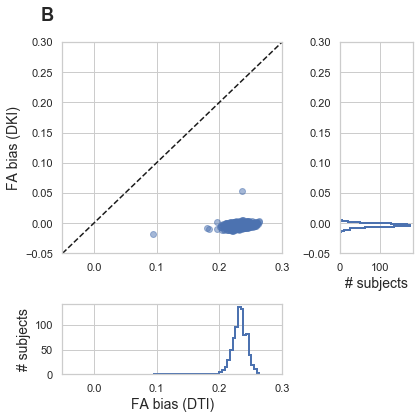

In [64]:
x = df["DTI"] 
y = df["DKI"] 
lb = -0.05 
ub = 0.3 
label = "B"
fig, ax = plt.subplots()
gs = gridspec.GridSpec(2, 2, width_ratios=[3,1], height_ratios=[3,1])
ax = plt.subplot(gs[0,0])
axx = plt.subplot(gs[1,0], sharex=ax)
axy = plt.subplot(gs[0,1])
ax.plot(x, y, 'o', alpha=0.5)
axx.hist(x, bins=40, histtype='step', linewidth=2)
axy.hist(y, bins=40, histtype='step', linewidth=2, orientation='horizontal')
ax.plot([lb, ub], [lb, ub], 'k--')
ax.set_ylabel('FA bias (DKI)', fontdict=font)
axx.set_xlabel('FA bias (DTI)', fontdict=font)
axx.set_ylabel('# subjects', fontdict=font)
axy.set_xlabel('# subjects', fontdict=font)
#     ax.set_yticks([80, 85, 90, 95, 100])
#     ax.set_yticklabels([80, 85, 90, 95, 100], fontdict=font)
#     axy.set_yticklabels('')
ax.set_xlim([lb, ub])
ax.set_ylim([lb, ub])
axy.set_ylim([lb, ub])
#     axy.set_yticks([80, 85, 90, 95, 100])
#     axy.set_yticklabels([80, 85, 90, 95, 100], fontdict=font)
#     axy.set_xticks([0, 100, 200])

ax.text(-0.1, 1.1, label, transform=ax.transAxes, fontdict={"size":18, "weight":"bold"})   
fig.set_size_inches([6, 6])    
plt.tight_layout()
fig.savefig("/Users/arokem/Desktop/B.png")

fig.set_size_inches([6, 6])    

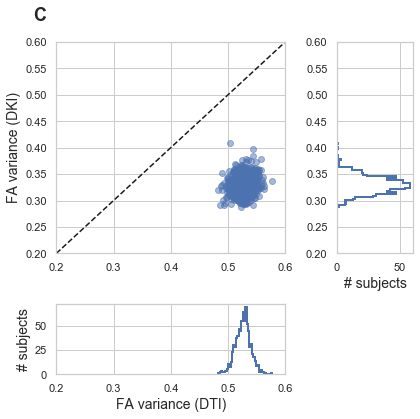

In [66]:
x = df["DTI_VAR"] 
y = df["DKI_VAR"] 
lb = 0.2
ub = 0.6 
label = "C"
fig, ax = plt.subplots()
gs = gridspec.GridSpec(2, 2, width_ratios=[3,1], height_ratios=[3,1])
ax = plt.subplot(gs[0,0])
axx = plt.subplot(gs[1,0], sharex=ax)
axy = plt.subplot(gs[0,1])
ax.plot(x, y, 'o', alpha=0.5)
axx.hist(x, bins=40, histtype='step', linewidth=2)
axy.hist(y, bins=40, histtype='step', linewidth=2, orientation='horizontal')
ax.plot([lb, ub], [lb, ub], 'k--')
ax.set_ylabel('FA variance (DKI)', fontdict=font)
axx.set_xlabel('FA variance (DTI)', fontdict=font)
axx.set_ylabel('# subjects', fontdict=font)
axy.set_xlabel('# subjects', fontdict=font)
#     ax.set_yticks([80, 85, 90, 95, 100])
#     ax.set_yticklabels([80, 85, 90, 95, 100], fontdict=font)
#     axy.set_yticklabels('')
ax.set_xlim([lb, ub])
ax.set_ylim([lb, ub])
axy.set_ylim([lb, ub])
#     axy.set_yticks([80, 85, 90, 95, 100])
#     axy.set_yticklabels([80, 85, 90, 95, 100], fontdict=font)
#     axy.set_xticks([0, 100, 200])

ax.text(-0.1, 1.1, label, transform=ax.transAxes, fontdict={"size":18, "weight":"bold"})   
fig.set_size_inches([6, 6])    
plt.tight_layout()
fig.savefig("/Users/arokem/Desktop/C.png")

fig.set_size_inches([6, 6])    

In [31]:
np.random.seed(2020)

In [32]:
subject = np.random.choice(subjects)
print(subject)

917558


In [33]:
path_wm = '%s/%s/%s_white_matter_mask.nii.gz' % (bucket, subject, subject)
path_dti_fa_1000 = '%s/%s/%s_dti_1000_FA.nii.gz' % (bucket, subject, subject)
path_dti_fa_2000 = '%s/%s/%s_dti_2000_FA.nii.gz' % (bucket, subject, subject)
path_dki_fa_1000 = '%s/%s/%s_dki_1000_2000_FA.nii.gz' % (bucket, subject, subject)
path_dki_fa_2000 = '%s/%s/%s_dki_2000_3000_FA.nii.gz' % (bucket, subject, subject)
mask = afd.s3fs_nifti_read(path_wm, fs).get_fdata().astype(bool)
dti_fa_1000 = afd.s3fs_nifti_read(path_dti_fa_1000).get_fdata()[mask]
dti_fa_2000 = afd.s3fs_nifti_read(path_dti_fa_2000).get_fdata()[mask]
dki_fa_1000 = afd.s3fs_nifti_read(path_dki_fa_1000).get_fdata()[mask]
dki_fa_2000 = afd.s3fs_nifti_read(path_dki_fa_2000).get_fdata()[mask]
diff_dti = dti_fa_1000 - dti_fa_2000
diff_dki = dki_fa_1000 - dki_fa_2000
median_dki = np.nanmedian(diff_dki)
median_dti = np.nanmedian(diff_dti)
dki_var = (np.abs(stats.scoreatpercentile(diff_dki, 97.5) - 
                      stats.scoreatpercentile(diff_dki, 2.5)))

dti_var = (np.abs(stats.scoreatpercentile(diff_dti, 97.5) - 
                      stats.scoreatpercentile(diff_dti, 2.5)))


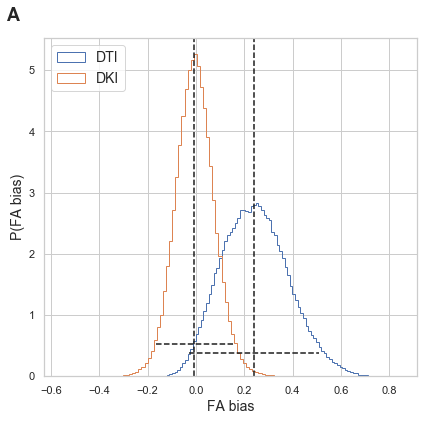

In [67]:
fig, ax = plt.subplots()
ax.hist(diff_dti, bins=100, histtype='step', label="DTI", density=True)
ax.hist(diff_dki, bins=100, histtype='step', label="DKI", density=True)
ax.set_xlabel('FA bias', fontdict=font)
ax.set_ylabel('P(FA bias)', fontdict=font)
ax.legend(loc="upper left", fontsize=14)

plt.axvline(x=np.median(diff_dti), ymin=0, ymax=10, linestyle='--', color='k')
plt.axvline(x=np.median(diff_dki), ymin=0, ymax=10, linestyle='--', color='k')
ax.plot([np.median(diff_dti) - dti_var/2, np.median(diff_dti) + dti_var/2],
        [0.38, 0.38], 'k--')
ax.plot([np.median(diff_dki) - dki_var/2, np.median(diff_dki) + dki_var/2],
        [0.52, 0.52], 'k--')


ax.text(-0.1, 1.05, "A", transform=ax.transAxes, fontdict={"size":18, "weight":"bold"})   

# ax.set_ylim([80, 100])
# axy.set_ylim([80, 100])
# axy.set_yticks([80, 85, 90, 95, 100])
# axy.set_xticks([0, 100, 200])
fig.set_size_inches([6, 6])
plt.tight_layout()
fig.savefig(f"/Users/arokem/Downloads/A.png")
